# Exercício 7:

## Dada a seguinte equação à diferenças:

## \begin{align*} 
y(k+1) - 0,2 \cdot y(k) &= e(k) &\mathrm{Onde:} \, 
 \begin{cases} 
 e(k) = 0 \ \mathrm{para} \ k \lt 0 \\
 e(k) = 10 \ \mathrm{para} \ k = 0 \\
 e(k) = 15 \ \mathrm{para} \ k \geq 1 \\
 y(0) = 0
 \end{cases}
\end{align*}

## Elabore um programa no Python Notebook que utilize esta equação e permita visualizar graficamente (kmax = 20) os valores de $y(k)$ e compare com os valores obtidos a partir da expressão exata de $y(k)$.

# Solução:

## 1. Obter a expressão exata para $y(k)$:

## \begin{align*}
y(k+1) - 0,2 \cdot y(k) &= e(k) \\
\mathcal{Z} \left[ y(k+1) - 0,2 \cdot y(k) \right] &= \mathcal{Z} \left[ e(k) \right] \\
z \cdot Y(z) - z \cdot y(0) - 0,2 \cdot Y(z) &= E(z) \\
z \cdot Y(z) - 0,2 \cdot Y(z) &= E(z) \\
Y(z) \cdot (z - 0,2) &= E(z) \\
\frac{Y(z)}{E(z)} &= \frac{1}{z - 0,2}
\end{align*}

## Com o conhecimento da expressão da função de transferência entre $E(z)$ e $Y(z)$ e do comportamento de $e(k)$, a expressão de $e(k)$ e sua transformada são dadas por:

## \begin{align*}
e(k) &= 10 \cdot \delta (k) + 15 \cdot u(k-1) \\
\mathcal{Z} \left[ e(k) \right] &= \mathcal{Z} \left[ 10 \cdot \delta (k) + 15 \cdot u(k-1) \right] \\
E(z) &= 10 \cdot \mathcal{Z} [\delta(k)] + 15 \cdot z^{-1} \cdot \mathcal{Z} [u(z)] \\
E(z) &= 10 + 15 \cdot z^{-1} \cdot \frac{z}{z-1} \\
E(z) &= 10 + \frac{15}{z-1}
\end{align*}

## Assim, é dada a sequência para o cálculo de $Y(z)$ e da sua transformada inversa, $y(k)$:

## \begin{align*}
\frac{Y(z)}{E(z)} &= \frac{1}{z - 0,2} \\
E(z) \cdot \frac{Y(z)}{E(z)} &= E(z) \cdot \frac{1}{z - 0,2} \\
Y(z) &= \left( 10 + \frac{15}{z-1} \right) \cdot \left( \frac{1}{z - 0,2} \right) \\
Y(z) &= \frac{10}{z - 0,2} + \frac{15}{\left( z-1 \right) \cdot \left( z-0,2 \right)} \\
Y(z) &= \frac{10}{z - 0,2} + \frac{A}{z-1} + \frac{B}{z-0,2} \\
\mathrm{Onde:} & \\
A &= \left. (z-1) \cdot \frac{15}{\left( z-1 \right) \cdot \left( z-0,2 \right)} \right\rvert_{z = 1} = 18,75 \\
B &= \left. (z-0,2) \cdot \frac{15}{\left( z-1 \right) \cdot \left( z-0,2 \right)} \right\rvert_{z = 0,2} = -18,75 \\
\mathrm{Assim:} & \\
Y(z) &= \frac{10}{z - 0,2} + \frac{18,75}{z-1} - \frac{18,75}{z-0,2} \\
Y(z) &= \frac{18,75}{z-1} - \frac{8,75}{z-0,2} \\
Y(z) &= z^{-1} \cdot \frac{18,75 \cdot z}{z-1} - z^{-1} \cdot \frac{8,75 \cdot z}{z-0,2} \\
\mathcal{Z^{-1}} \left[ Y(z) \right] &= 18,75 \cdot \mathcal{Z^{-1}} \left[ z^{-1} \cdot \frac{z}{z-1} \right] - 8,75 \cdot \mathcal{Z^{-1}} \left[ z^{-1} \cdot \frac{z}{z-0,2} \right] \\
y(k) &= 18,75 \cdot u(k-1) - 8,75 \cdot (0,2)^{k-1} \cdot u(k-1) \\
y(k) &= \left[ 18,75 - 8,75 \cdot (0,2)^{k-1} \right] \cdot u(k-1) \\
y(k) &= \left[ 18,75 - \left( \frac{8,75}{0,2} \right) \cdot (0,2)^{k} \right] \cdot u(k-1) \\
y(k) &= \left[ 18,75 - 43,75 \cdot (0,2)^{k} \right] \cdot u(k-1)
\end{align*}

# 2. Elaboração dos gráficos da evolução temporal das expressões recursiva e exata:

In [1]:
import numpy as np
import scipy as scp
import scipy.signal
from lcapy.discretetime import n, z
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'})

r = 
 [-8.75 18.75]
p = 
 [0.2 1. ]


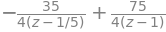

In [2]:
# Solução exata -> y(k)
# y(0)=0;
# Y(z)=(10z+5)/(z^2-1,2z+0,2)

# Método da frações parciais de X(z)/z - Transformada Z inversa
# Y(z)=(10z+5)/(z^2-1,2z+0,2)

num = [10, 5];
den = [1, -1.2, 0.2];
r, p, k = scp.signal.residue(num,den);

print("r = \n",r);
print("p = \n",p);

Y = (10*z+5)/(z**2-1.2*z+0.2);
Y.partfrac()

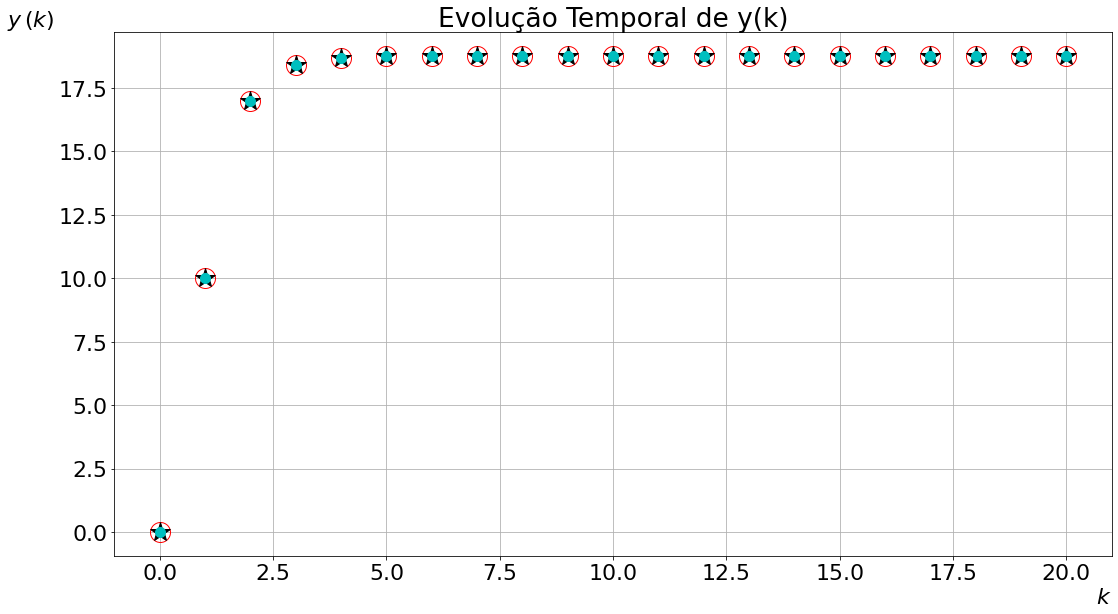

In [3]:
Kmax = 20;
k = np.linspace(0, Kmax, Kmax+1);
recursiva = np.zeros(Kmax+1);
e = 15 * np.heaviside(k,2/3);

for i in range(1, Kmax+1):
    recursiva[i] = 0.2 * recursiva[i-1] + e[i-1];
    
exata = (18.75 - 43.75*(0.2)**k) * np.heaviside(k,0);  # Expressão exata obtida a partir do equacionamento

y = Y(n, causal=True);                                 # Expressão exata obtida a partir das funções da biblioteca lcapy
y = y.seq(nvals=(0,Kmax+1));
y = y.zeroextend();

plt.figure();
plt.plot(k, recursiva, 'ro', markerfacecolor='None', markersize=20);
plt.plot(k, exata, 'k*', markersize=20);
plt.plot(y.n, y.as_array(), 'c.', markersize=20);
plt.title("Evolução Temporal de y(k)");
plt.xlabel("$k$");
plt.ylabel("$y \, (k)$", rotation=0);
plt.grid();
plt.tight_layout();
plt.show();

# 3. Comparação entre os valores obtidos das curvas:

## Ambas as expressões tiveram os mesmos resultados como pode ser observado na figura acima, aonde os pontos das curvas se coincidiram.